# Assignment 10

In [1]:
import numpy as np
np.set_printoptions(threshold=10) # printing setup
import matplotlib.pyplot as plt

In [2]:
# This formula shall be imitated by the neural network
def formula_1(x):
    return x + 0.75

# This formula shall be imitated by the neural network, too
def formula_2(x):
    return(np.sin(x) + 0.5)

In [3]:
# Input data
X = np.random.uniform(low=-0.5, high=1.55, size=100)# make 100 uniformly distributed samples
X = X.reshape(-1, 1) # -1 indicates "as many rows as required"
X # input data as column vector

array([[ 1.25332801],
       [ 0.71497192],
       [-0.20579309],
       ...,
       [ 0.05363839],
       [ 0.27503846],
       [ 0.48578522]])

In [4]:
# Target values with formula_1
y_1 = np.array([formula_1(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_1 = y_1.reshape(-1, 1)
y_1 # target data as column vector

array([[2.00332801],
       [1.46497192],
       [0.54420691],
       ...,
       [0.80363839],
       [1.02503846],
       [1.23578522]])

In [5]:
# Target values with formula_2
y_2 = np.array([formula_2(x) for x in X.flatten()]) # one output per sample, |X|-many samples
y_2 = y_2.reshape(-1, 1)
y_2 # target data as column vector

array([[1.45002876],
       [1.15559621],
       [0.29565642],
       ...,
       [0.55361268],
       [0.77158396],
       [0.96690288]])

### Code below contains the parts to be edited

In [ ]:
# Simple neural-network based regressor
class NeuralNetwork:
    
    # Function called at object initialization
    def __init__(self):
        
        # These are members of the class. You can access them in every method by "self.var_name" and from outside the class with "instance_name.var_name"
        
        # Sample to compute pass with
        self.X          = 0.0 # set me!
        self.y          = 0.0 # set me!
        
        # Parameters to be learned
        self.weight_1   = 1.0 # teach me!
        self.weight_2   = 1.0 # teach me!
        self.bias       = 1.0 # teach me!
        
        # State information
        self.hidden     = 0.0 # use me!
        self.output     = 0.0 # use me!
        self.error      = 0.0 # use me!
        
    # Set sample to be used in feed-forward and back-propagation pass
    def set_sample(self, X, y):
        self.X = float(X)
        self.y = float(y)
        
    # (a) Feed-forward pass
    def feed_forward(self):
        
        # TODO: Feed-forward pass and error estimation, store results in state information members
        # Consider the loss function: 0.5 ∗ (𝑡𝑎𝑟𝑔𝑒𝑡 − 𝑜𝑢𝑡𝑝𝑢𝑡)2

        print("TODO (a)") # remove this line, just here to produce no compile error in initial setup
      
    # (b) Back-propagation pass
    def back_prop(self):
        
        # TODO: Derivations of parameters
        # TODO: Update the parameters with learning rate of 0.01
        print("TODO (b)") # remove this line, just here to produce no compile error in initial setup
        
def execute_nn(X, y):
    
    # Instantiate neural network
    nn = NeuralNetwork()
    
    # Collect mean error of each epoch to plot it later
    epoch_error = []

    # Perform multiple epochs, aka inputting the dataset multiple times
    for epoch in range(0,100):

        
        # Example use of neural network class
        # nn = NeuralNetwork() # instantiates neural network
        # nn.set_sample(2,5) # sets sample with 2 as input and 5 as target
        # nn.feed_forward() # perform feed-forward to calculate output
        # nn.back_prop() # use difference between target and actual output to update parameters
        #Remember final error of each epoch in "epoch_error"
        print("TODO (c)") # remove this line, just here to produce no compile error in initial setup
        
    # Print final parameters of trained neural network
    print("Weight_1:"+ str(nn.weight_1))
    print("Weight_2:" + str(nn.weight_2))
    print("Bias:" + str(nn.bias))
    
    # Plot epoch errors with logarithmic transformation
    plt.plot(list(range(len(epoch_error))), np.log(epoch_error))
    ax = plt.gca()
    ax.set_xlabel('# Epoch')
    ax.set_ylabel('Error')
    plt.show()
    
    # Plot datapoints as originally transformed and as transformed by neural network
    computed = []
    for i in range(0, X.shape[0]):
        nn.set_sample(X[i], y[i])
        nn.feed_forward()
        computed.append(nn.output)
    plt.scatter(X.transpose().flatten(), y.transpose().flatten(), c='blue', s=16)
    plt.scatter(X.transpose().flatten(), computed, c='red', s=16)
    plt.show()

print("Imitation of formula 'x+0.75'")
execute_nn(X,y_1)
print()
print("Imitation of formula 'sin(x)+0.5'")
execute_nn(X,y_2)

[[0.99089925]]  - Correct:  1
[[0.006409]]  - Correct:  0


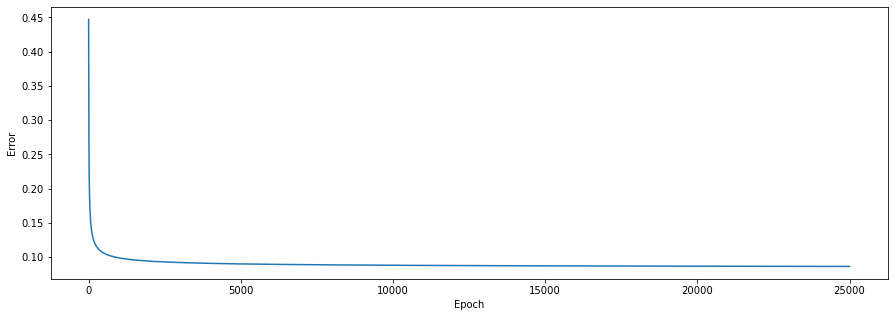

In [6]:
#Practice

import numpy as np # helps with the math
import matplotlib.pyplot as plt # to plot error during training

# input data
inputs = np.array([[0, 1, 0],
                   [0, 1, 1],
                   [0, 0, 0],
                   [1, 0, 0],
                   [1, 1, 1],
                   [1, 0, 1]])
# output data
outputs = np.array([[0], [0], [0], [1], [1], [1]])

# create NeuralNetwork class
class NeuralNetwork:

    # intialize variables in class
    def __init__(self, inputs, outputs):
        self.inputs  = inputs
        self.outputs = outputs
        # initialize weights as .50 for simplicity
        self.weights = np.array([[.50], [.50], [.50]])
        self.error_history = []
        self.epoch_list = []

    #activation function ==> S(x) = 1/1+e^(-x)
    def sigmoid(self, x, deriv=False):
        if deriv == True:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    # data will flow through the neural network.
    def feed_forward(self):
        self.hidden = self.sigmoid(np.dot(self.inputs, self.weights))

    # going backwards through the network to update weights
    def backpropagation(self):
        self.error  = self.outputs - self.hidden
        delta = self.error * self.sigmoid(self.hidden, deriv=True)
        self.weights += np.dot(self.inputs.T, delta)

    # train the neural net for 25,000 iterations
    def train(self, epochs=25000):
        for epoch in range(epochs):
            # flow forward and produce an output
            self.feed_forward()
            # go back though the network to make corrections based on the output
            self.backpropagation()    
            # keep track of the error history over each epoch
            self.error_history.append(np.average(np.abs(self.error)))
            self.epoch_list.append(epoch)

    # function to predict output on new and unseen input data                               
    def predict(self, new_input):
        prediction = self.sigmoid(np.dot(new_input, self.weights))
        return prediction

# create neural network   
NN = NeuralNetwork(inputs, outputs)
# train neural network
NN.train()

# create two new examples to predict                                   
example = np.array([[1, 1, 0]])
example_2 = np.array([[0, 1, 1]])

# print the predictions for both examples                                   
print(NN.predict(example), ' - Correct: ', example[0][0])
print(NN.predict(example_2), ' - Correct: ', example_2[0][0])

# plot the error over the entire training duration
plt.figure(figsize=(15,5))
plt.plot(NN.epoch_list, NN.error_history)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()